# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
from scipy.special import gamma
import numpy as np

def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = 1
    V = np.pi**(D/2)/gamma(1+D/2)*R**(D)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

##### Проверим результат для слачев двух и трёх измерений (R = 1):


In [3]:
print('Одно измерение :', 'объём, который ограничивает сфера =', np.pi,'результат работы функции --', getSphereVolumeExact(2, R = 1.0))
print()
print('Два измерения :', 'объём, который ограничивает сфера =', np.pi*4/3,'результат работы функции --', getSphereVolumeExact(3, R = 1.0))

Одно измерение : объём, который ограничивает сфера = 3.141592653589793 результат работы функции -- 3.141592653589793

Два измерения : объём, который ограничивает сфера = 4.1887902047863905 результат работы функции -- 4.188790204786391


##### Отлично, простые тесты пройдены. Тепрь построим график:

Text(0.5, 1.0, 'V(D)')

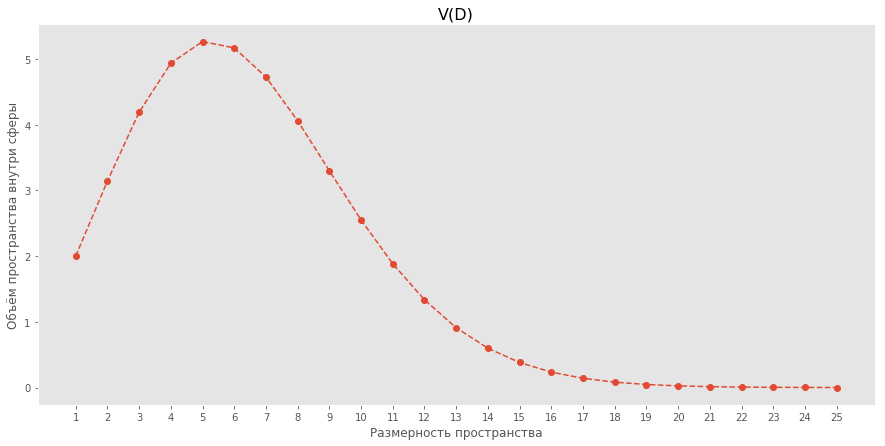

In [4]:
import matplotlib.pyplot as plt

D = np.arange(1, 26) # Массив с размерностями пространства
V = getSphereVolumeExact(D, R = 1.0) # Соответствующие объёмы, заключённые внутри сфер

plt.figure(figsize=(15, 7)) 
plt.plot(D, V,'o--')
plt.grid()
plt.xticks(D)
plt.xlabel('Размерность пространства', fontsize = 12)
plt.ylabel('Объём пространства внутри сферы', fontsize = 12)
plt.title('V(D)', fontsize = 16)

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [5]:
def isInside(x, R):   # Проверяем, что точка внутри сферы
    x = x**2
    p = np.sum(x, axis = 0)
    return ((p < R**2)).astype(int)


def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = 1
    
    x = np.random.uniform(low=-R, high=R, size=(D, N))
    inside = isInside(x, R)

    V = np.count_nonzero(inside)/N*(2*R)**D # Доля точек, попавших в сферу * объём, по которому распределялись точки

    return V

#getSphereVolumePseudorandom(N = 1000000, D = 3, R = 1)

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

Text(0.5, 1.0, 'N = 10^7')

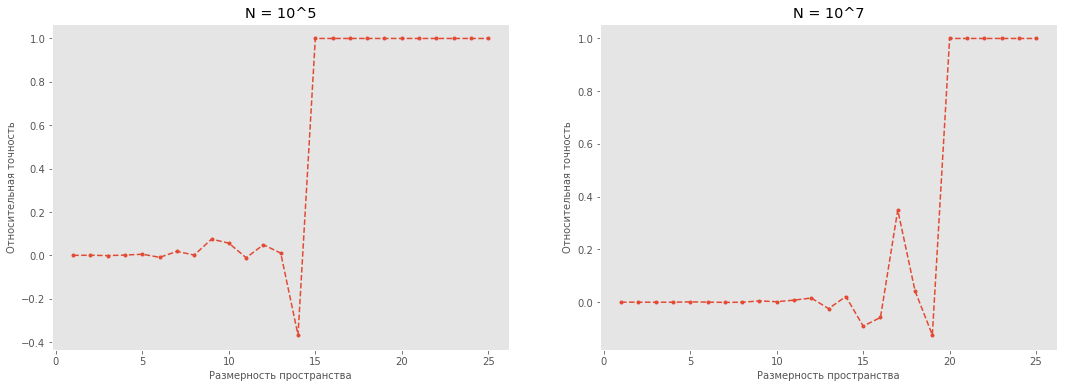

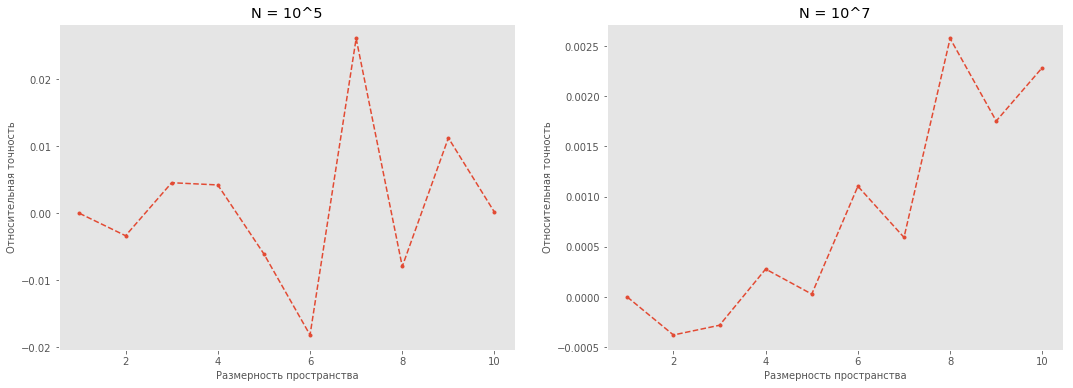

In [6]:
# Для вычисления точного объёма будем использовать написанную в первом пункте функцию

R = 1
plt.figure(figsize=(18, 6)) 

N = 10**5
D = np.arange(1, 26)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumePseudorandom(N, d, R )
    eps[d-1] = (V_ex - V_rd)/V_ex
    
plt.subplot(121)
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^5')

#-----------------------------------------------------------------------#

N = 10**7
D = np.arange(1, 26)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumePseudorandom(N, d, R )
    eps[d-1] = (V_ex - V_rd)/V_ex
    
plt.subplot(122)
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^7')



R = 1
plt.figure(figsize=(18, 6)) 

N = 10**5
D = np.arange(1, 11)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumePseudorandom(N, d, R )
    eps[d-1] = (V_ex - V_rd)/V_ex
    
plt.subplot(121)
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^5')

#-----------------------------------------------------------------------#

N = 10**7
D = np.arange(1, 11)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumePseudorandom(N, d, R )
    eps[d-1] = (V_ex - V_rd)/V_ex
    
plt.subplot(122)
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^7')



#### Мне не нравится, что это $\epsilon = (V_{exact} - V_{random})/V_{exact}$ автор задания назвал относительной точностью. Лучше для восприятия называть эту величину относительной погрешностью. Однако задание пишу не я, поэтому вывод будет в двух вариантах...

Можно видеть, что относительная точность уменьшается с увеличением размерности пространства, однако увеличивается с увеличением числа случайных точек N.

#### или

Можно видеть, что относительная погрешность увеличивается с увеличением размерности пространства, однако уменьшается с увеличением числа случайных точек N. С некоторого D относительная поогрешность выходит на 1, это связано с тем, что при увеличении D всё меньше случайных точек попадает во внутреннюю область.

Кроме того, графики предложенной величины менее показательны, чем аналогичные графики для её модуля, поэтому для наглядности построим и их.

Text(0.5, 1.0, 'N = 10^7')

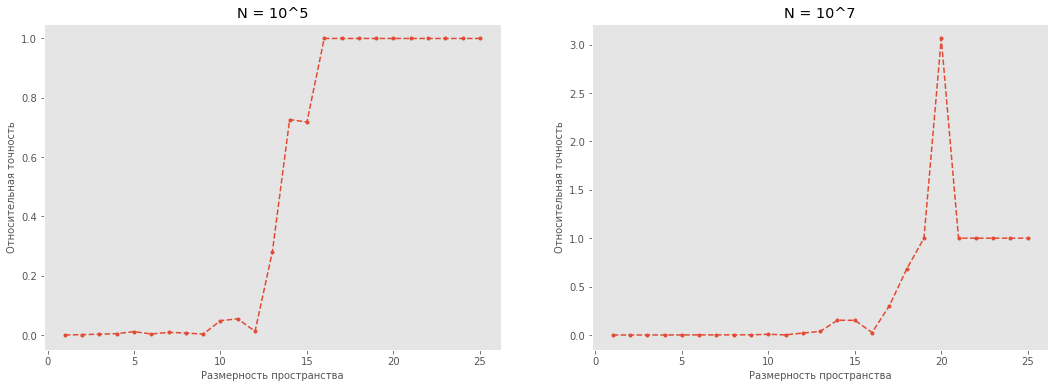

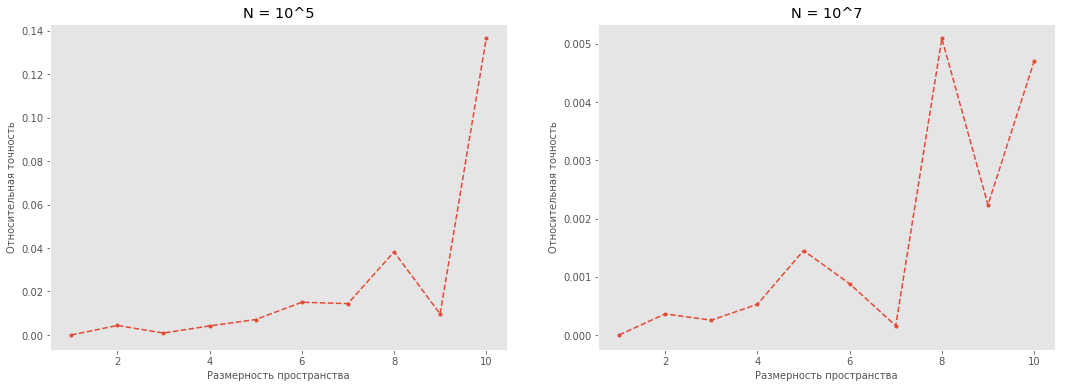

In [7]:
R = 1
plt.figure(figsize=(18, 6)) 

N = 10**5
D = np.arange(1, 26)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumePseudorandom(N, d, R )
    eps[d-1] = abs(V_ex - V_rd)/V_ex
    
plt.subplot(121)
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^5')

#-----------------------------------------------------------------------#

N = 10**7
D = np.arange(1, 26)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumePseudorandom(N, d, R)
    eps[d-1] = abs(V_ex - V_rd)/V_ex
    
plt.subplot(122)
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^7')

R = 1
plt.figure(figsize=(18, 6)) 

N = 10**5
D = np.arange(1, 11)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumePseudorandom(N, d, R )
    eps[d-1] = abs(V_ex - V_rd)/V_ex
    
plt.subplot(121)
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^5')

#-----------------------------------------------------------------------# Если сделать D очень боьлшим, не увеличив число точек,
                                                                 # то с некоторого момента начнут происходить странные вещи
N = 10**7                                                 # Поэтому построим наиболее показательную часть отдельно (0<D<11)
D = np.arange(1, 11)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumePseudorandom(N, d, R)
    eps[d-1] = abs(V_ex - V_rd)/V_ex
    
plt.subplot(122)
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^7')

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [8]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [9]:
sobol_seq.i4_sobol_generate?

In [10]:
def isInside_sob(x, R):   # Проверяем, что точка внутри сферы
    x = x**2
    p = np.sum(x, axis = 1)
    return ((p < R**2)).astype(int)


def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    X = sobol_seq.i4_sobol_generate(D, N)
    x = (X - 0.5) * 2 * R
    inside = isInside_sob(x, R)

    V = np.count_nonzero(inside)/N*(2*R)**D # Доля точек, попавших в сферу * объём, по которому распределялись точки
    
    return V
#print(getSphereVolumeQuasirandom(10000, 2, R = 1))

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

Text(0.5, 1.0, 'N = 10^5')

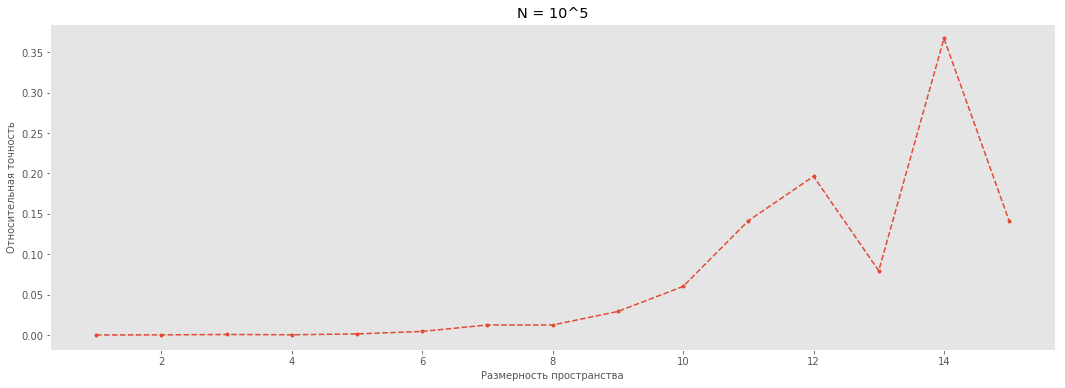

In [11]:
R = 1
plt.figure(figsize=(18, 6)) 


N = 10**5
D = np.arange(1, 16)
eps = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd = getSphereVolumeQuasirandom(N, d, R)
    eps[d-1] = abs(V_ex - V_rd)/V_ex
    
plt.plot(D, eps, '.--')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^5')

# Эта часть работала безумно долго, поэтому я решила оставить только N = 10**5, всё равно требовалось строить графики только
                                                        # для одного (любого) N

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

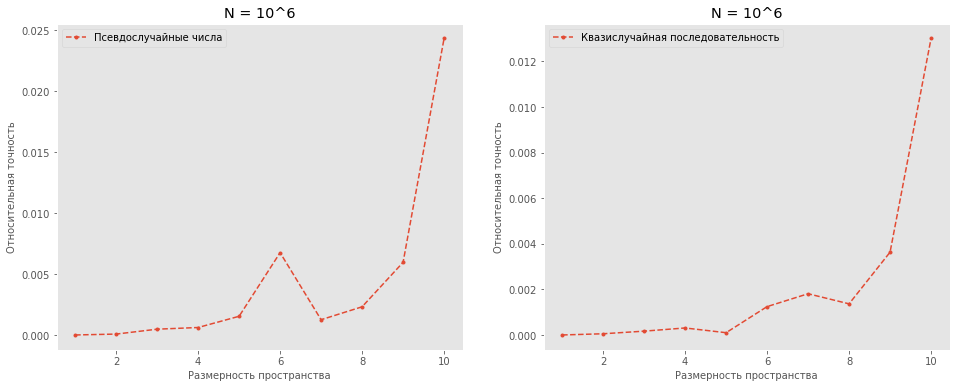

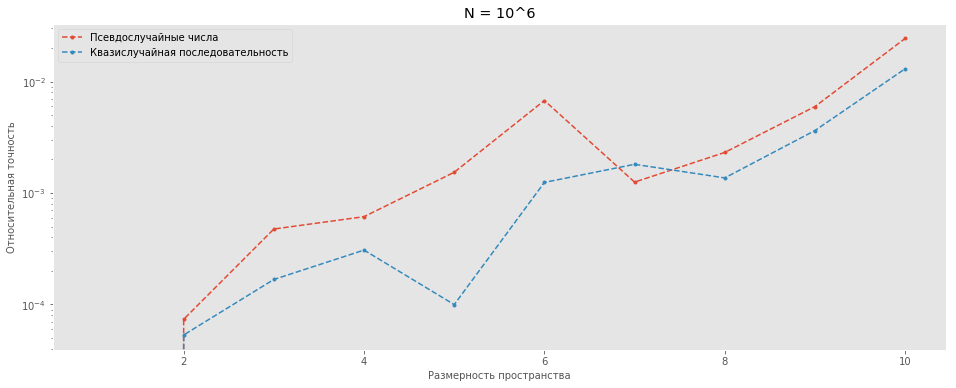

In [13]:
# Теперь построим оба графика в логарифмическом масштабе
R = 1
plt.figure(figsize=(16, 6)) 


N = 10**6
D = np.arange(1, 11)
eps_p = np.empty(len(D))
eps_q = np.empty(len(D))
for d in (D):
    V_ex = getSphereVolumeExact(d, R)
    V_rd_p = getSphereVolumePseudorandom(N, d, R)
    V_rd_q = getSphereVolumeQuasirandom(N, d, R)
    eps_p[d-1] = abs(V_ex - V_rd_p)/V_ex
    eps_q[d-1] = abs(V_ex - V_rd_q)/V_ex
    
plt.subplot(121)
plt.plot(D, eps_p, '.--', label ='Псевдослучайные числа')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^6')
plt.legend()

plt.subplot(122)
plt.plot(D, eps_q, '.--', label ='Квазислучайная последовательность')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^6')
plt.legend()

plt.figure(figsize=(16, 6)) 
plt.semilogy(D, eps_p, '.--', label ='Псевдослучайные числа')
plt.semilogy(D, eps_q, '.--', label ='Квазислучайная последовательность')
plt.grid()
plt.xlabel('Размерность пространства', fontsize = 10)
plt.ylabel('Относительная точность', fontsize = 10)
plt.title('N = 10^6')
plt.legend()

Из графика видно, что квазислучайная последовательность даёт лучшее приближение к точному значению.

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [14]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    
    state = np.random.randint(low = 0, high = 2, size=(N, N))
    state[state == 0] = -1
    return state

#getInitialState(6)


2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [15]:
# Сначала напишем вспомогательную функцию для вычисления энергии для одной ячейки

def Energy(i, j, state):
    E = 0
    N = len(state[0])
    
    l = state[i, j - 1] # c левой и верхней ячейками проблем быть не может
    d = state[i - 1, j] 
    if i == N-1:
        u = state[0, j]
    else:
        u = state[i + 1, j]
    if j == N-1:
        r = state[i, 0]
    else:
        r = state[i, j + 1]
        
    E = -state[i,j]*(l + r + u + d)
    return E

def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
   
    E_old = Energy(i, j, state) # До переворота
    
    state_new = state.copy()
    state_new[i, j] = -state_new[i, j]
    
    E_new = Energy(i, j, state_new) # После переворота

    dE = E_new - E_old
    
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [16]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = len(state[0])
    for k in range (N**2):
        
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        dE = getDeltaE(i, j, state)
        if dE<0:                      # Переворачиваем
            state[i,j] = -state[i,j]
        else:                         # Переворачиваем с некоторой вероятностью
            ind = np.random.choice(a = [1, 0], size=1, p = [np.exp(-dE/T), (1 - np.exp(-dE/T))]) # Вероятность
            if ind[0] == 1:
                    state[i,j] = -state[i,j]

    return state
#a = np.eye(3)
#makeFlip(0.005, a)


4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [17]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    # Воспользуемся уже написанной ранее функцией для вычисления энергии одной ячейки
    N = len(state[0])
    E = 0
    
    for i in range(N):
        for j in range(N):
            E += Energy(i, j, state)
    E = E/2 # Так как каждая пара ячеек была учтена дважды
    
    return E

#a = np.ones((3, 3))
#print(getEnergy(a))

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [18]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M


В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [19]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

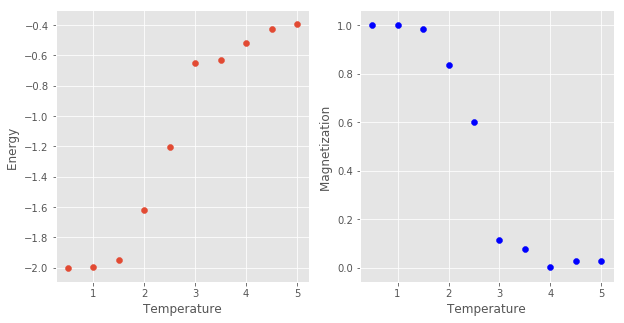

In [20]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Всё логично: с увеличением температуры энергия системы увеличивается, а намагниченность уменьшается (как и должно быть для ферромагнетика). На всякий случай получим боьлше точек для графиков.

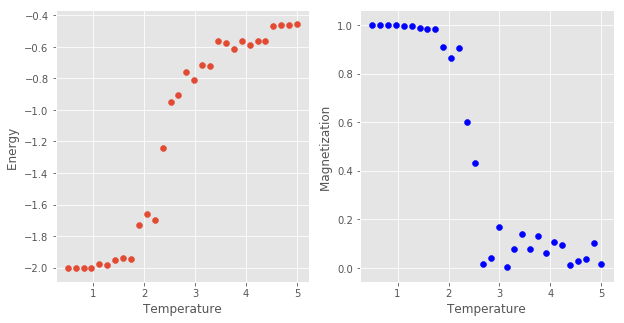

In [21]:
N       = 10         # размер решетки NxN
Nt      = 30         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

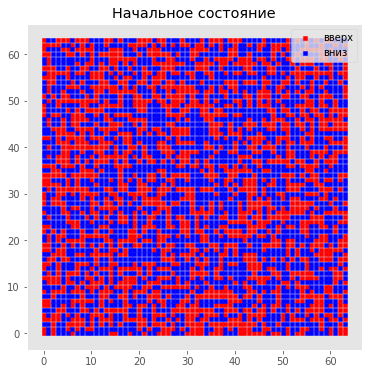

In [22]:
import numpy as np
import matplotlib.pyplot as plt

N = 64
state = getInitialState(N)

x_up = []
y_up = []

x_down = []
y_down = []

for i in range(N):
    for j in range(N):
        if state[i,j] == 1:
            x_up.append(j)
            y_up.append(i)
        else:
            x_down.append(j)
            y_down.append(i)
            
fig = plt.figure(figsize=(6, 6))

plt.scatter(x_up, y_up, s = 10, c='r', marker='s', label='вверх')
plt.scatter(x_down, y_down, s = 10, c='b', marker='s', label='вниз')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend()
plt.title('Начальное состояние')
plt.grid()

    

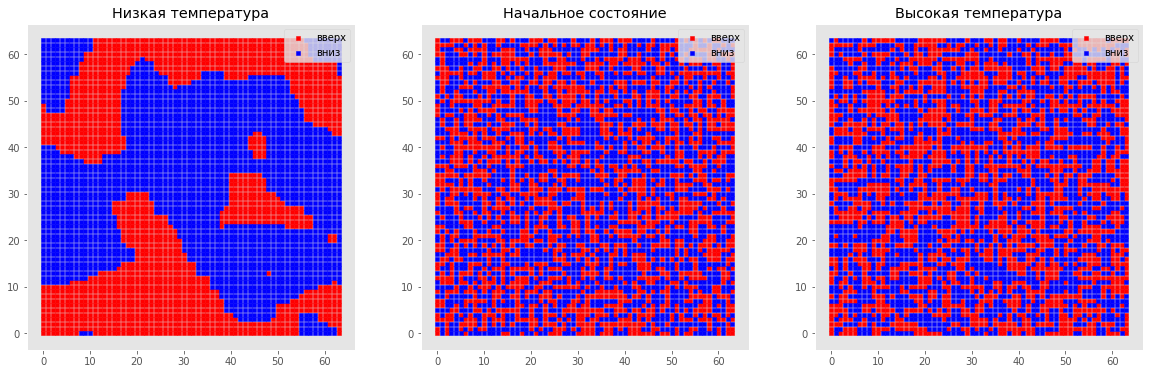

In [23]:
state_l = state.copy()
state_h = state.copy()

for i in range(20):
    state_l =  makeFlip(0.5, state_l) # Низкая температура
    state_h =  makeFlip(10, state_h) # Высокая температура
    
x_up_l = []
y_up_l = []
x_down_l = []
y_down_l = []

x_up_h = []
y_up_h= []
x_down_h = []
y_down_h = []

for i in range(N):
    for j in range(N):
        if state_l[i,j] == 1:
            x_up_l.append(j)
            y_up_l.append(i)
        else:
            x_down_l.append(j)
            y_down_l.append(i)

for i in range(N):
    for j in range(N):
        if state_h[i,j] == 1:
            x_up_h.append(j)
            y_up_h.append(i)
        else:
            x_down_h.append(j)
            y_down_h.append(i)
            
fig = plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.scatter(x_up_l, y_up_l, s = 10, c='r', marker='s', label='вверх')
plt.scatter(x_down_l, y_down_l, s = 10, c='b', marker='s', label='вниз')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend()
plt.title('Низкая температура')
plt.grid()

plt.subplot(133)
plt.scatter(x_up_h, y_up_h, s = 10, c='r', marker='s', label='вверх')
plt.scatter(x_down_h, y_down_h, s = 10, c='b', marker='s', label='вниз')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend()
plt.title('Высокая температура')
plt.grid()

plt.subplot(132)
plt.scatter(x_up, y_up, s = 10, c='r', marker='s', label='вверх')
plt.scatter(x_down, y_down, s = 10, c='b', marker='s', label='вниз')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend()
plt.title('Начальное состояние')
plt.grid()


Таким образом, можно видеть, что при низкой температуре в системе образуются достаточно большие области(домены), частицы в которых имеют одинковое направление спина. (Система сохраняет самопроизвольную намагниченность при температуре меньше, чем температура Кюри)